<a href="https://colab.research.google.com/github/Jaykay000/Master-Thesis_Fake-News/blob/main/211004_Master_Thesis_Code_vF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Initial code to start

- Check if GPU is activated in Colab
- Install necessary libraries and packages

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Oct  5 11:52:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install python-igraph

     |████████████████████████████████| 3.2 MB 5.0 MB/s 


In [ ]:
###https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777#s6
!pip install powerlaw

In [ ]:
import pandas as pd
import igraph
import glob
import matplotlib.pyplot as plt
import numpy as np
import igraph.remote.gephi as igg
import networkx as nx
import datetime as dt
print(igraph.__version__)

import powerlaw
import math
import warnings
warnings.filterwarnings('ignore')

0.9.6


# Data Import and Data frame Building

- Import tweets, retweets and user data from the original Cornell files
- Merge all data into one data frame
- Reduce the data to only one week (49)
- Reduce the data to data points to include only community 2 AND community 0
- Save the merged and pruned data frame onto a file that can be directly imported from google drive

In [ ]:
#make sure, that the path name corresponds to the drive name (sometimes gdrive, sometimes drive)
base_path_users = 'gdrive/MyDrive/Privat/Master Thesis Data/users/users-'

user_df = pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/users/users-0.csv')
print(user_df.shape)
for i in range(1, 6): 
 user_df = pd.concat([user_df, pd.read_csv(base_path_users + str(i) + '.csv')])
 print(user_df.shape)

(500000, 24)
(1000000, 24)
(1500000, 24)
(2000000, 24)
(2500000, 24)
(2559018, 24)


In [ ]:
user_df.user_community.value_counts().plot(kind='bar')

In [ ]:
#import retweets from csv's
# use glob to get all the csv files in the folder
base_path_retweets = 'gdrive/MyDrive/Privat/Master Thesis Data/retweets'

retweet_df = pd.DataFrame()
for r in glob.glob(base_path_retweets + "/*.csv"):
  retweet_df = pd.concat([retweet_df, pd.read_csv(r, header=0, dtype={'retweeted_id': str, 'user_id': str, 'timestamp': str})])
  # find documentation to read the csv columns as strings
  print(retweet_df.shape)

(644312, 3)
(1292353, 3)
(1906790, 3)
(2581844, 3)
(3161699, 3)
(3655224, 3)
(4112531, 3)
(4718597, 3)
(5152506, 3)
(5747133, 3)
(6123503, 3)
(6596642, 3)
(7208195, 3)
(7646360, 3)
(7850187, 3)
(8313316, 3)
(8318809, 3)
(8325229, 3)
(8366850, 3)
(8437110, 3)
(8517926, 3)
(8585732, 3)
(8656498, 3)
(8806361, 3)
(9013493, 3)
(9093549, 3)
(9222645, 3)
(9478466, 3)
(9930861, 3)
(10403610, 3)
(10947221, 3)
(11503862, 3)
(12050487, 3)
(12646254, 3)
(13243644, 3)
(13844708, 3)
(14468441, 3)
(15083205, 3)
(15604351, 3)
(16237583, 3)
(16846382, 3)
(17497914, 3)
(18113998, 3)
(18663214, 3)
(19303937, 3)
(19979182, 3)
(20552839, 3)
(21137477, 3)
(21733368, 3)
(22332827, 3)
(22991728, 3)
(23645365, 3)
(24291007, 3)
(24898063, 3)
(25566698, 3)


In [ ]:
#import tweets from csv's
# use glob to get all the csv files in the folder
base_path_tweets = 'gdrive/MyDrive/Privat/Master Thesis Data/tweets'

tweet_df = pd.DataFrame()
for t in glob.glob(base_path_tweets + "/*.csv"):
  tweet_df = pd.concat([tweet_df, pd.read_csv(t, header=0, dtype={'tweet_id': str, 'user_id': str, 'timestamp': str, 'user_community': str})])
  print(tweet_df.shape)

(52585, 25)
(158924, 25)
(278138, 25)
(401414, 25)
(527924, 25)
(658420, 25)
(792450, 25)
(928156, 25)
(1081569, 25)
(1241463, 25)
(1419051, 25)
(1606551, 25)
(1799911, 25)
(1995190, 25)
(2164535, 25)
(2326439, 25)
(2371792, 25)
(2510675, 25)
(2595198, 25)
(2626940, 25)
(2773110, 25)
(2918303, 25)
(3065791, 25)
(3216066, 25)
(3367461, 25)
(3523729, 25)
(3677685, 25)
(3836175, 25)
(3994877, 25)
(4161615, 25)
(4321703, 25)
(4505942, 25)
(4674580, 25)
(4867459, 25)
(5056027, 25)
(5252065, 25)
(5453196, 25)
(5659922, 25)
(5870431, 25)
(6077542, 25)
(6289399, 25)
(6503696, 25)
(6715624, 25)
(6942387, 25)
(7157690, 25)
(7393609, 25)


In [ ]:
#merge the retweet_df with the tweet_df
tweet_retweet_merge = pd.merge(retweet_df,tweet_df, how='inner', left_on='retweeted_id', right_on='tweet_id')

#drop all columns that are not necessary for the initial test
test_retweet_tweet_merge_df = tweet_retweet_merge[['user_id_y','user_id_x', 'retweeted_id', 'timestamp_x', 'user_community', 'user_active_status']]
test_retweet_tweet_merge_df = test_retweet_tweet_merge_df.rename(columns={'user_id_x': 'user_id_source', 'user_id_y': 'user_id_target', 'user_community': 'user_community_target', 'user_active_status': 'user_active_status_target'})

user_df['user_id'] = user_df['user_id'].apply(str)

#delete former data frames to decrease RAM usage
del tweet_retweet_merge

In [ ]:
test_retweet_tweet_merge_df = pd.merge(test_retweet_tweet_merge_df, user_df, left_on='user_id_source',right_on='user_id', how='inner')
#test_retweet_tweet_merge_df

In [ ]:
test_retweet_tweet_merge_df.head(1)

,user_id_target,user_id_source,retweeted_id,timestamp_x,user_community_target,user_active_status_target,user_id,user_community,user_active_status,closeness_centrality_detractor_cluster,closeness_centrality_promoter_cluster,retweet_count_by_community_0,quote_count_by_community_0,retweet_count_by_community_1,quote_count_by_community_1,retweet_count_by_community_2,quote_count_by_community_2,retweet_count_by_community_3,quote_count_by_community_3,retweet_count_by_community_4,quote_count_by_community_4,retweet_count_by_suspended_users,quote_count_by_suspended_users,name,handle,created_at,verified,description,followers_count,location
0,4041824789,39323169,1333463037601169408,2020-12-01T02:23:13Z,1,active,39323169,1.0,deleted,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#test_retweet_tweet_merge_df = pd.merge(test_retweet_tweet_merge_df, user_df, left_on='user_id_source',right_on='user_id', how='inner')
test_retweet_tweet_merge_df = test_retweet_tweet_merge_df.rename(columns={'user_community': 'user_community_source', 'user_active_status': 'user_active_status_source'})

test_retweet_tweet_merge_df['user_community_target'].fillna('-6', inplace=True)
test_retweet_tweet_merge_df['user_community_source'].fillna('-6', inplace=True)

test_retweet_tweet_merge_df['user_community_target'] = test_retweet_tweet_merge_df['user_community_target'].apply(float).apply(int).apply(str)
test_retweet_tweet_merge_df['user_community_source'] = test_retweet_tweet_merge_df['user_community_source'].apply(float).apply(int).apply(str)


display(test_retweet_tweet_merge_df.tail(50))

In [ ]:
display(np.unique(test_retweet_tweet_merge_df['user_community_target'],return_counts = True))

(array(['-6', '0', '1', '2', '3', '4'], dtype=object),
 array([ 172966,  958944, 5514784, 1588130,   50251,   16168]))

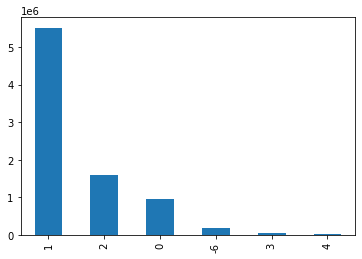

In [ ]:
test_retweet_tweet_merge_df.user_community_target.value_counts().plot(kind='bar')

In [ ]:
#select the required communities from the orignal data set
select_commun = ['0', '2']

#drop all users that are not of the community 2.0 OR community 0.0
test_retweet_tweet_merge_df = test_retweet_tweet_merge_df.loc[(test_retweet_tweet_merge_df['user_community_target'].isin(select_commun))]

#select only retweets from week 49 to reduce the number of rows for testing
test_retweet_tweet_merge_df['timestamp_week'] = pd.to_datetime(test_retweet_tweet_merge_df['timestamp_x']).dt.week
test_retweet_tweet_merge_df_final = test_retweet_tweet_merge_df[test_retweet_tweet_merge_df['timestamp_week'] == 49]

#repeat column user_id_x as 'Source' and user_id_y as 'Target' for the gephi edge export
test_retweet_tweet_merge_df_final['Source'] = test_retweet_tweet_merge_df_final['user_id_source']
test_retweet_tweet_merge_df_final['Target'] = test_retweet_tweet_merge_df_final['user_id_target']
test_retweet_tweet_merge_df_final = test_retweet_tweet_merge_df_final[['user_id_source','user_id_target', 'Source', 'Target', 'retweeted_id', 'timestamp_x', 'user_community_target', 'user_active_status_target']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
#delete former data frames to reduce RAM usage
del test_retweet_tweet_merge_df

In [ ]:
#save the df as a csv to allow easier read_csv in the next steps
test_retweet_tweet_merge_df_final.to_csv(r'gdrive/MyDrive/Privat/Master Thesis Data/final_merged_data_49.csv', index = False)

# Initialize Graph

- Import the merged csv of all retweets from cw49
- create the igraph graph
- calculate basic statistic information and the properties of the graph
- Exercise the pruning strategy to reduce the complexity of the graph


In [ ]:
test_retweet_tweet_merge_df_final = pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/final_merged_data_49.csv', dtype={'user_id_x': str, 'user_id_y': str, 'Source': str, 'Target': str, 'retweeted_id': str, 'timestamp': str, 'user_community': str, 'user_community': str, 'timestamp_week':str})

display(test_retweet_tweet_merge_df_final)

,user_id_source,user_id_target,Source,Target,retweeted_id,timestamp_x,user_community_target,user_active_status_target
0,394392730,4710708974,394392730,4710708974,1333567344832987139,2020-12-01T01:12:56Z,2,active
1,394392730,2618797484,394392730,2618797484,1333576971565993985,2020-12-01T01:03:27Z,2,active
2,394392730,116384038,394392730,116384038,1333618398740287489,2020-12-01T04:04:42Z,2,active
3,394392730,814945374209064960,394392730,814945374209064960,1333920785879101440,2020-12-01T23:59:36Z,2,active
4,394392730,1153305068201885699,394392730,1153305068201885699,1334186430851997696,2020-12-04T07:57:16Z,2,active
...,...,...,...,...,...,...,...,...
1143855,913805842360799235,1020470638203613184,913805842360799235,1020470638203613184,1334627458910461959,2020-12-06T04:05:26Z,0,active
1143856,919665395048607746,1191527793177300992,919665395048607746,1191527793177300992,1335678886449909760,2020-12-06T20:16:11Z,0,active
1143857,920353297835483141,1108138788621086720,920353297835483141,1108138788621086720,1335536050438107144,2020-12-06T10:55:37Z,2,active
1143858,922403875,28407251,922403875,28407251,1335395799610650626,2020-12-06T01:54:26Z,2,active


In [ ]:
g = igraph.Graph.DataFrame(test_retweet_tweet_merge_df_final, directed=True)
g.vs['user_community'] = test_retweet_tweet_merge_df_final['user_community_target']

In [ ]:
#basic statistic examination
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices: 303896
Number of edges: 1143860
Density of the graph: 2.477161550875306e-05


In [ ]:
degrees = []
total = 0
n_vertices = g.vcount()

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/n_vertices)
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)))

Average degree: 7.5279700950325115
Maximum degree: 18159
Vertex ID with the maximum degree: 73223


In [ ]:
print("Outgoing neighbors:", len(g.neighbors(g.vs[73223], mode="out")), "Incoming neighbors:", len(g.neighbors(g.vs[73223], mode="in")))

Outgoing neighbors: 8 Incoming neighbors: 18151


In [ ]:
print("The directed assortativity is:", g.assortativity_degree(directed=True))
print("The undirected assortativity is:", g.assortativity_degree(directed=False))
#g.assortativity_nominal(types = "types1", directed=False)

The directed assortativity is: -0.0945994470626018
The undirected assortativity is: -0.16231093680362235


In [ ]:
#execution of the diameter takes a few minutes
g.diameter()

* Pruning the graph

In [ ]:
#write list with vertices with 1 or fewer degrees
del_low_degree_vs = [v.index for v in g.vs if v.degree() <= 1]
print(del_low_degree_vs)
len(del_low_degree_vs)

In [ ]:
#execute the pruning strategies
g.delete_vertices(del_low_degree_vs)

In [ ]:
print("New number of vertices:", g.vcount())
print("New number of edges:", g.ecount())
print("New Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

New number of vertices: 152497
New number of edges: 995246
New Density of the graph: 8.559348003280035e-05


In [ ]:
pruned_degrees = []
total = 0
n_vertices = g.vcount()

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    pruned_degrees.append(len(neighbours))
    
print("Average degree:", total/n_vertices)
print("Maximum degree:", max(pruned_degrees))
print("Vertex ID with the maximum degree:", pruned_degrees.index(max(pruned_degrees)))

Average degree: 13.052663331081924
Maximum degree: 12610
Vertex ID with the maximum degree: 34541


# Power Law analysis

- in-depth analysis about the distribution of degree in the graph
- further examination of the power law distribution




In [ ]:
#load data frame
test_retweet_tweet_merge_df_final = pd.read_csv('test_data.csv', dtype={'user_id_x': str, 'user_id_y': str, 'Source': str, 'Target': str, 'retweeted_id': str, 'timestamp': str, 'user_community': str, 'user_community': str, 'timestamp_week':str})
g = igraph.Graph.TupleList(test_retweet_tweet_merge_df_final.itertuples(index=False), directed=True, weights=False, edge_attrs=['Source', 'Target', 'retweeted_id', 'timestamp_x', 'user_community'])

 $$ f(x) = x ^{- \alpha} $$

In [ ]:
degree = powerlaw.Fit(g.degree(), discrete = True)
print("Alpha degree:", -degree.power_law.alpha)
print("Sigma degree:", degree.power_law.sigma)
print("Xmin degree:",degree.power_law.xmin)

Calculating best minimal value for power law fit
Alpha degree: -2.1927831878341655
Sigma degree: 0.007893689163579557
Xmin degree: 14.0


In [ ]:
degree = powerlaw.Fit(g.indegree(), discrete = True)
print("Alpha degree:", -degree.power_law.alpha)
print("Sigma degree:", degree.power_law.sigma)
print("Xmin degree:",degree.power_law.xmin)

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha degree: -1.7773795511763666
Sigma degree: 0.00581203126859637
Xmin degree: 4.0


In [ ]:
degree = powerlaw.Fit(g.outdegree(), discrete = True)
print("Alpha degree:", -degree.power_law.alpha)
print("Sigma degree:", degree.power_law.sigma)
print("Xmin degree:",degree.power_law.xmin)

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha degree: -3.712952438614128
Sigma degree: 0.10000075362611638
Xmin degree: 82.0


In [ ]:
def Fig_powerlaw(network_degree, xmax):
    degree = powerlaw.Fit(network_degree, discrete=True, xmax=xmax)
    Fig_Degree = degree.plot_ccdf(color='r', label=r"Empirical, no $x_{max}$")
    degree.power_law.plot_ccdf(color='r', linestyle='--', ax=Fig_Degree, label=r"Fit, $x_{max} = $" + str(xmax))

    Fig_Degree.set_ylabel(u"CCDF")
    Fig_Degree.set_xlabel(r"Node Degree")
    handles, labels = Fig_Degree.get_legend_handles_labels()
    leg = Fig_Degree.legend(handles, labels, loc=3)
    leg.draw_frame(False)
    
    return Fig_Degree

Calculating best minimal value for power law fit


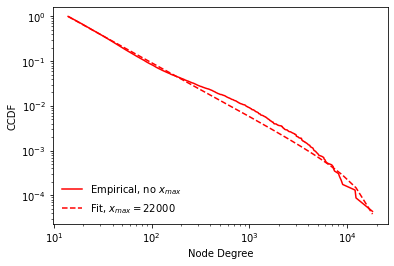

In [ ]:
Fig_powerlaw(g.degree(),22000)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


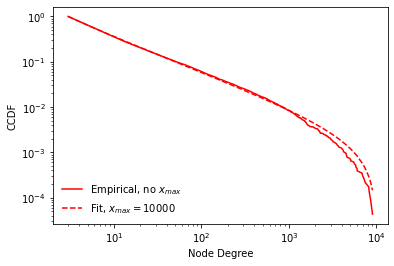

In [ ]:
Fig_powerlaw(g.indegree(),10000)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


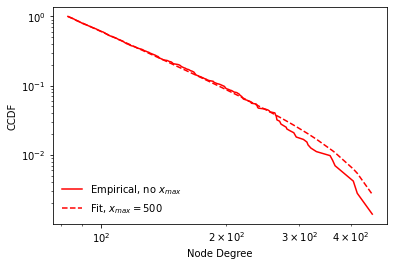

In [ ]:
Fig_powerlaw(g.outdegree(),500)

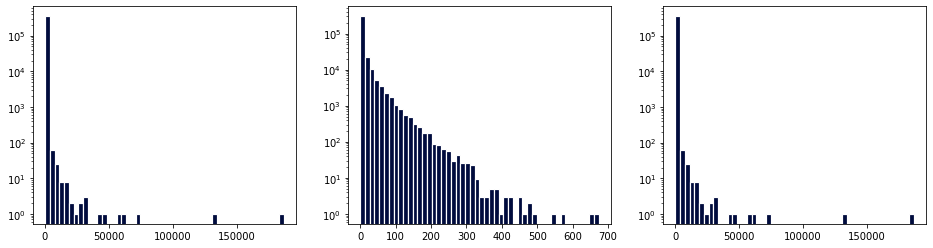

In [ ]:
fig, (ax_degree, ax_in_degree, ax_out_degree) = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
ax_degree.hist(sorted(g.degree()), bins=50, color='#000B3D', edgecolor='white', linewidth=1.2 )
ax_degree.set_yscale('log')
ax_in_degree.hist(sorted(g.indegree()), bins=50, color='#000B3D', edgecolor='white', linewidth=1.2 )
ax_in_degree.set_yscale('log')
ax_out_degree.hist(sorted(g.outdegree()), bins=50,   color='#000B3D', edgecolor='white', linewidth=1.2 )
ax_out_degree.set_yscale('log')
plt.show()

# Betweenness calculation

- Define the 100 vertices with the highest degree from community 0 AND community 2
- set up a function that calculates the betweenness
- manually execute the function with specific vertices
- write the calculated betweenness centrality values into a csv that is stored on the google drive

In [ ]:
#largest degree nodes of community 2
list_largest_degrees = { v.index : (v.degree(), v['user_community'])  for v in g.vs if v.degree() >= 1350 and v['user_community'] == 2}

print(list_largest_degrees.keys())
len(list_largest_degrees)

dict_keys([502, 1216, 1256, 1309, 1310, 1410, 1421, 2471, 3424, 6827, 7157, 7831, 8199, 8640, 8701, 9804, 10833, 11480, 11629, 11790, 12935, 12962, 14450, 14778, 18047, 18429, 19135, 20099, 20748, 20920, 21349, 23487, 23658, 25886, 28828, 29351, 30066, 30323, 30454, 33421, 34541, 34804, 35131, 37589, 39532, 42283, 43312, 44783, 45351, 45455, 45750, 47602, 48427, 48607, 49686, 52565, 53129, 54947, 56157, 60927, 61745, 62674, 62879, 68110, 68587, 70427, 71237, 71972, 73683, 74026, 74341, 74385, 74790, 77185, 78787, 81441, 82899, 83552, 85830, 91135, 91812, 93116, 94620, 98961, 99072, 100939, 102317, 104332, 104962, 104992, 105117, 106714, 106837, 107138, 108023, 108945, 109121, 109405, 110666, 113065])


100

In [ ]:
#largest degrees of community 0
largest_degrees_0 = { v.index : (v.degree(), v['user_community'])  for v in g.vs if v.degree() >= 400 and v.degree() <= 1000 and v['user_community'] == 0}

print(largest_degrees_0.keys())
len(largest_degrees_0)

dict_keys([2700, 6062, 29037, 47695, 49160, 113484, 113675, 114073, 114595, 114694, 115408, 118068, 118334, 118684, 118737, 119326, 119693, 119843, 120456, 121799, 121809, 122102, 122340, 122695, 123013, 123273, 124785, 125679, 126285, 127579, 128147, 128588, 128624, 128760, 128967, 129008, 129572, 129701, 129757, 129760, 130643, 132495, 133061, 133193, 133823, 136205, 136405, 136754, 139900, 140097, 140511, 142156, 143736, 144221, 144276, 144574, 145444, 145629, 147890, 148124, 148701, 149116, 150390, 150641, 151277])


65

In [ ]:
#define manual calculator for betweenness per relevant node
#build dictionary with vertex ID as key and betweenness as value
#very long execution, thus manual triggering

def manual_calc_betweennessII(vertex_list):
  
  denominator = len(g.vs) * (len(g.vs)-1)
  betweenness_largest_vs = {}

  for vertex in vertex_list:
    temp_betweenness = { vertex : (g.betweenness(vertices=vertex, cutoff = 6, directed=True)/denominator)}
    betweenness_largest_vs[vertex] = temp_betweenness[vertex]
    temp_betweenness = {}

  #import csv of already calculated csv's to df
  vertex_betweenness_ranked_df = pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/betweenness_49_II.csv', index_col=0)
  #append the new calculated betweenness values to the existing csv
  vertex_betweenness_ranked_df = vertex_betweenness_ranked_df.append(pd.DataFrame.from_dict(data=betweenness_largest_vs, orient= 'index' , columns=["Betweenness"]))
  #write df into a csv in order to store it permanently
  vertex_betweenness_ranked_df.to_csv(r'gdrive/MyDrive/Privat/Master Thesis Data/betweenness_49_II.csv', index = True)

  return vertex_betweenness_ranked_df.tail(10)

In [ ]:
#trigger the betweenness calculation function
#only 15 vertices at once, otherwise the runtime might recycle

vertex_list = [144221, 144276, 144574, 145444, 145629, 147890, 148124, 148701, 149116, 150390, 150641, 151277]
manual_calc_betweennessII(vertex_list)

#if a in temp_node_csv.index or b in temp_node_csv.index:
 # print("Node is already calculated")
#else:
 # manual_calc_betweenness(a, b)

,Betweenness
144574,0.000027
145444,0.000074
145629,0.000145
147890,0.000125
148124,0.000045
148701,0.000250
149116,0.000076
150390,0.000071
150641,0.000000
151277,0.000090


# Enriching the data set

- import the csv containing the betweenness values of the top-degree vertices
- further enrich the vertices with information from the originial data set
  - degree
  - User ID
  - incoming edges (user was retweeted)
  - Percentage of retweets to the respective own community (from 0 to 0 and 2 to 2) (now called homophily)
- rank the nodes regarding their betweenness
- store the enriched data frame in another csv titled superspreaders_49_final
- plot Betweenness x Degree to figure out how the degree influences the betweenness value


In [ ]:
#further add columns to enrich the betweenness csv
vertex_betweenness_ranked_df= pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/betweenness_49_II.csv', index_col=0)

temp_degree_storage = []
temp_name_storage = []
temp_inc_edges_storage = []
calc_edge_ratio = {}
temp_edge_ratio_storage = {}
temp_comunity_storage = []


community_0_set = set( [v.index for v in g.vs if v['user_community'] == 0] )
community_2_set = set( [v.index for v in g.vs if v['user_community'] == 2] )


#for each vertex in the list, calculate the following parameters and add them to the data frame
#degree
#User ID
#incoming edges (user was retweeted)
#Percentage of retweets to the respective other community (from 0 to 2 and vice versa) (now called homophily)
for vertex in vertex_betweenness_ranked_df.index:
  temp_degree_storage.append(g.degree(vertices=vertex))
  temp_name_storage.append(g.vs[vertex]['name'])
  temp_inc_edges_storage.append(len(g.neighbors(vertex, mode='in')))
  temp_comunity_storage.append(g.vs[vertex]['user_community'])

calc_edge_ratio = { v : g.neighbors(vertex=v) for v in vertex_betweenness_ranked_df.index}
  
for v in calc_edge_ratio.keys():
  same_com = 0
  for n in calc_edge_ratio[v]:
    if (v in community_0_set and n in community_0_set) or (v in community_2_set and n in community_2_set):
      same_com += 1
  temp_edge_ratio_storage[v] = same_com / len(calc_edge_ratio[v])

#append new columns
vertex_betweenness_ranked_df['Degree'] = temp_degree_storage
vertex_betweenness_ranked_df['User-ID'] = temp_name_storage
vertex_betweenness_ranked_df['Incoming_Edges'] = temp_inc_edges_storage
vertex_betweenness_ranked_df['Homophily'] = vertex_betweenness_ranked_df.index.map(temp_edge_ratio_storage)
vertex_betweenness_ranked_df['User_Community'] = temp_comunity_storage

#vertex_betweenness_ranked_df = vertex_betweenness_ranked_df.drop(vertex_betweenness_ranked_df.loc[vertex_betweenness_ranked_df['User_Community']==0].index, inplace=True)

#edit the df by removing duplicates and sorting by betweenness
vertex_betweenness_ranked_df = vertex_betweenness_ranked_df[~vertex_betweenness_ranked_df.index.duplicated(keep='first')]
vertex_betweenness_ranked_df.sort_values(by = ['Betweenness'], ascending=False, inplace=True)
vertex_betweenness_ranked_df

,Betweenness,Degree,User-ID,Incoming_Edges,Homophily,User_Community
61745,0.005548,6860,1546656000,6508,0.758309,2
74026,0.002665,11203,2922345639,11052,0.736767,2
3424,0.002637,3976,16585101,3721,0.690895,2
25886,0.001791,5070,115681686,4886,0.757791,2
108945,0.001743,3968,951302891708583936,3802,0.695817,2
...,...,...,...,...,...,...
39532,0.000000,5875,341190477,5875,0.807660,2
128624,0.000000,689,1203661881476571136,689,0.323657,0
37589,0.000000,1372,304679484,1372,0.783528,2
121390,0.000000,1696,1113828112503115776,1693,0.212264,0


In [ ]:
#write new df into a csv file
enriched_superspreaders_df = vertex_betweenness_ranked_df
enriched_superspreaders_df.to_csv(r'gdrive/MyDrive/Privat/Master Thesis Data/superspreaders_49_final.csv', index = True)

y=0.000000x+(0.000053)


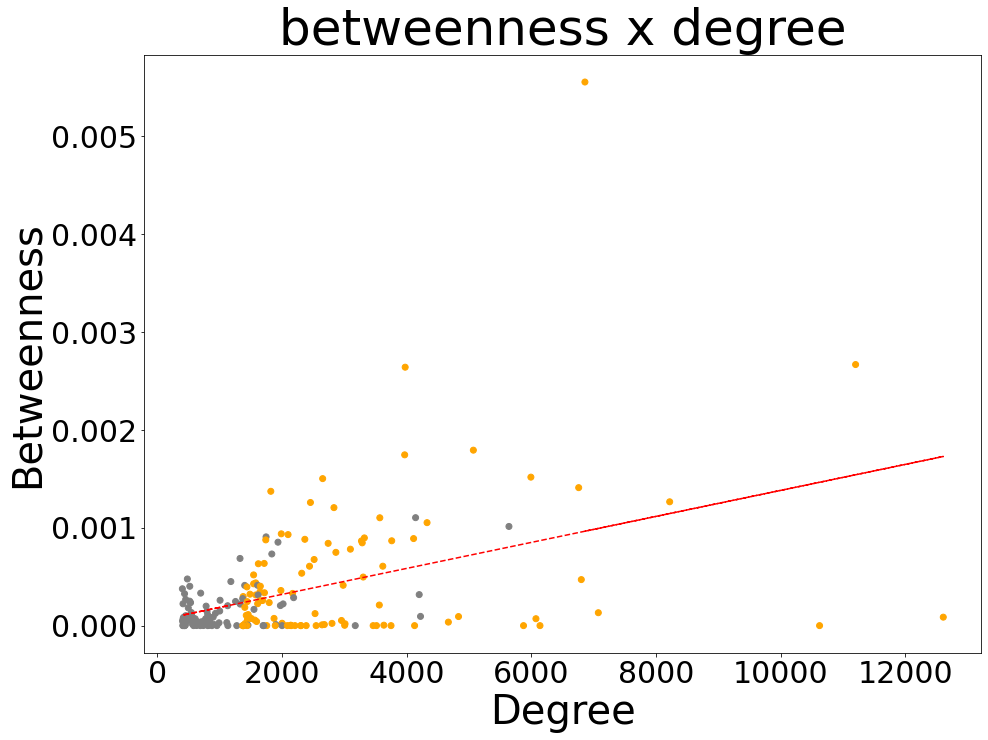

In [ ]:
#plot the betweenness x degree

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
enriched_superspreaders_df = pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/superspreaders_49_II.csv', index_col=0)

plt.figure(figsize=(15,11))
plt.title('betweenness x degree', fontsize=50)
plt.xlabel('Degree', fontsize=40)
plt.ylabel('Betweenness', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
scatter_colors = np.where(enriched_superspreaders_df['User_Community']==2,'orange','grey')

# calc the trendline
z = np.polyfit(enriched_superspreaders_df.Degree, enriched_superspreaders_df.Betweenness, 1)
p = np.poly1d(z)
plt.plot(enriched_superspreaders_df.Degree,p(enriched_superspreaders_df.Degree),"r--")

plt.scatter( enriched_superspreaders_df.Degree, enriched_superspreaders_df.Betweenness, c=scatter_colors)
# the line equation:
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))

In [ ]:
#Different multiplication approach
plt.hist((enriched_superspreaders_df["Edge_Ratio"] * enriched_superspreaders_df["Degree"]), bins=10, color='#000B3D', edgecolor='white', linewidth=1.2 )
plt.show()

In [ ]:
enriched_superspreaders_df

# Homophily
- Calculate the homophily for all users (where degree >1) in the original dataset in cw49
- plot Betweenness X Homophily to see how betweenness and homophily influence one another
- plot Homophily X Degree
- plot various histograms to see the distribution of homophily in the network

In [ ]:
### identify the 100 nodes with the highest homophily X degree

# establish which node is in which community
community_0_set = set( [v.index for v in g.vs if v['user_community'] == 0] )
community_2_set = set( [v.index for v in g.vs if v['user_community'] == 2] )

#initialize empty lists and dicts
temp_degree_storage = []
temp_name_storage = []
temp_edge_ratio_storage = {}
all_vertices_df = pd.DataFrame()
temp_comunity_storage = []

#retrieve all nodes with a degree >1 and identify its neighbors
all_vertices_edge_ratio = { vertex.index : g.neighbors(vertex=vertex) for vertex in g.vs if vertex.degree() > 1}

#for each vertex, calculate how many neighbors are in the same community and return it as a percentage of total edges
for v in all_vertices_edge_ratio.keys():
  same_com = 0
  for n in all_vertices_edge_ratio[v]:
    if (v in community_0_set and n in community_0_set) or (v in community_2_set and n in community_2_set):
      same_com += 1
  temp_edge_ratio_storage[v] = same_com / len(all_vertices_edge_ratio[v])

#retrieve the degree of each of the nodes
for vertex in all_vertices_edge_ratio.keys():
  temp_degree_storage.append(g.degree(vertices=vertex))
  temp_comunity_storage.append(g.vs[vertex]['user_community'])

#write the dictionary into a df
all_vertices_df = all_vertices_df.append(pd.DataFrame.from_dict(temp_edge_ratio_storage, orient= 'index', columns=['Homophily']))

#enrich the data set with the values of degree and degree*edge_ratio
all_vertices_df['Degree'] = temp_degree_storage
all_vertices_df['Homophily_X_Degree'] = all_vertices_df['Homophily']*all_vertices_df['Degree']
all_vertices_df['User_Community'] = temp_comunity_storage
all_vertices_df.sort_values(by=['Homophily_X_Degree'], ascending=False).head(50)

,Homophily,Degree,Homophily_X_Degree,User_Community
34541,0.793656,12610,10008.0,2
12962,0.804329,10625,8546.0,2
74026,0.736767,11203,8254.0,2
42283,0.731752,8220,6015.0,2
1309,0.827138,7075,5852.0,2
61745,0.758309,6860,5202.0,2
1310,0.824890,6139,5064.0,2
60927,0.703764,6802,4787.0,2
39532,0.807660,5875,4745.0,2
81441,0.691420,6760,4674.0,2


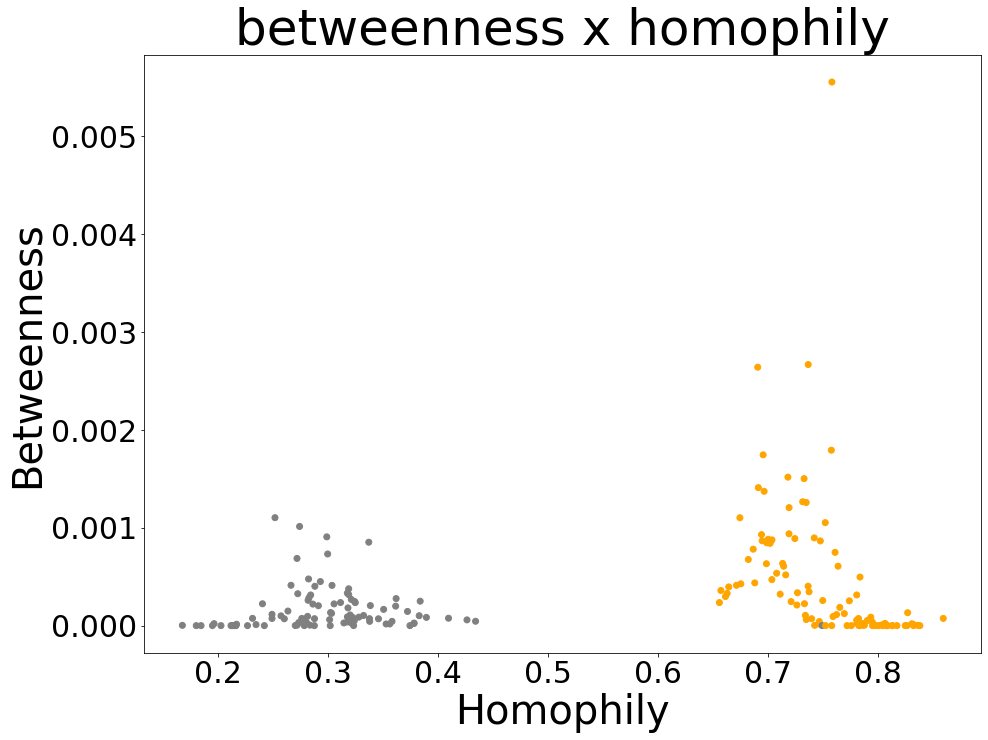

In [ ]:
#plot the betweenness x homophily

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
enriched_superspreaders_df = pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/superspreaders_49_II.csv', index_col=0)
enriched_superspreaders_df["Betweenness_std"] = (enriched_superspreaders_df["Betweenness"] - np.mean(enriched_superspreaders_df["Betweenness"]))/np.std(enriched_superspreaders_df["Betweenness"])
enriched_superspreaders_df["Betweenness_norm"] = (enriched_superspreaders_df["Betweenness"] - np.min(enriched_superspreaders_df["Betweenness"]))/(np.max(enriched_superspreaders_df["Betweenness"])- np.min(enriched_superspreaders_df["Betweenness"]))


plt.figure(figsize=(15,11))
plt.title('betweenness x homophily', fontsize=50)
plt.xlabel('Homophily', fontsize=40)
plt.ylabel('Betweenness', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
scatter_colors = np.where(enriched_superspreaders_df['User_Community']==2,'orange','grey')

plt.scatter( enriched_superspreaders_df.Homophily, enriched_superspreaders_df.Betweenness, c=scatter_colors)

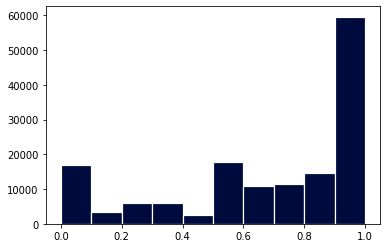

In [ ]:
#Histogram of homophily distribution in the dataset
plt.hist(all_vertices_df["Homophily"], bins=10, color='#000B3D', edgecolor='white', linewidth=1.2 )
plt.show()

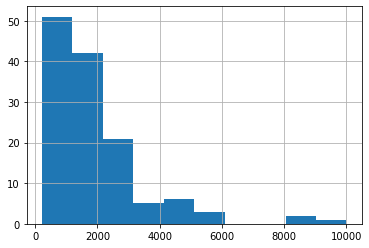

In [ ]:
# histogram of homophily * degree
(enriched_superspreaders_df["Homophily"] * enriched_superspreaders_df["Degree"]).hist()

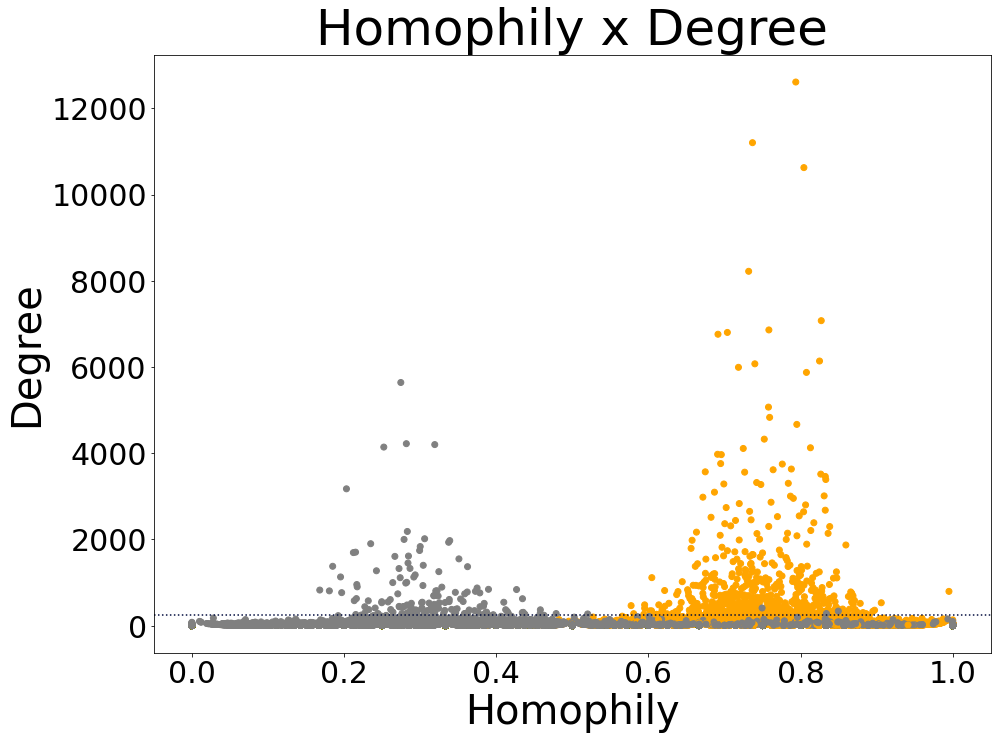

In [ ]:
#scatter plot showcasing the nodes and their degree
plt.figure(figsize=(15,11))
plt.title('Homophily x Degree', fontsize=50)
plt.xlabel('Homophily', fontsize=40)
plt.ylabel('Degree', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#Horizontal line code
plt.axhline(y=250, color='#000B3D', linestyle=':')
scatter_colors = np.where(all_vertices_df['User_Community']==2,'orange','grey')

#scatter_colors = np.where(all_vertices_df['Homophily_X_Degree']>=1000,'g','grey')

plt.scatter( all_vertices_df.Homophily, all_vertices_df.Degree, c=scatter_colors)

# Deeper information enriching
- Manual information enriching for the top-betweenness nodes
- Used to figure out:
  - activity status
  - names of top-users
  - number of tweets per day
  - specific tweet contents
- Has to be manually triggered for the various users

In [ ]:
#finding the correct user community
user_df.loc[user_df['user_id'] == 1092086942198452224]

,user_id,user_community,user_active_status,closeness_centrality_detractor_cluster,closeness_centrality_promoter_cluster,retweet_count_by_community_0,quote_count_by_community_0,retweet_count_by_community_1,quote_count_by_community_1,retweet_count_by_community_2,quote_count_by_community_2,retweet_count_by_community_3,quote_count_by_community_3,retweet_count_by_community_4,quote_count_by_community_4,retweet_count_by_suspended_users,quote_count_by_suspended_users,name,handle,created_at,verified,description,followers_count,location
86403,1092086942198452224,2.0,suspended,NaN,0.2513,9,9,35,58,15947,1406,6,0,6,1,6093,403,🌟🌟Rooster⭐️⭐️,no_silenced,2019-02-03T15:46:31Z,False,Followed by👉 @Pam_Sands...My bestie♥️\n\nFollo...,105830.0,NaN


In [ ]:
tweet_df.loc[tweet_df['user_id'] == "1092086942198452224"].head(1)

In [ ]:
#to copy specific full texts of a tweet made by a user
tweet_df.loc[tweet_df['user_id'] == "16585101"]['text'][120429]

'@TheDemocrats USED CORRUPT SOFTWARE TO CHEAT WE THE PPL OUT OF OUR #vote  #TrumpIsMyPresident PERIOD‼️ @GOP @JudiciaryGOP @SenateGOP @WhiteHouse #StopTheCheating #STOPTHESTEAL https://t.co/L9cVnoJje2'

In [ ]:
# number of tweets per day made by a specific user
# manual export is necessary
top3_tweet_df = tweet_df.loc[tweet_df['user_id'] == "2922345639"]
top3_tweet_df = top3_tweet_df[['user_id', 'timestamp']]

top3_tweet_df['Date'] = top3_tweet_df['timestamp'].str[:10]
top3_tweet_df.drop(columns='timestamp', inplace=True)
top3_tweet_df['Counts'] = top3_tweet_df.groupby('Date')['user_id'].transform('count')
top3_tweet_df.drop_duplicates(subset ='Date', keep='first', inplace = True)

top3_tweet_df.sort_values(by ='Date', ascending=True)

,user_id,Date,Counts
76782,2922345639,2020-11-03,1
24003,2922345639,2020-11-04,28
19849,2922345639,2020-11-05,18
4293,2922345639,2020-11-06,73
1533,2922345639,2020-11-07,113
7946,2922345639,2020-11-08,12
103797,2922345639,2020-11-09,6
1919,2922345639,2020-11-10,2
7100,2922345639,2020-11-11,11
24222,2922345639,2020-11-12,2


# Gephi Visualization
- Preparing the data of the graph for an export to gephi
- preparing a csv containing all vertices and a csv containing all edges

In [ ]:
nodes = pd.DataFrame(data = (g.vs, g.vs['name'], g.vs['user_community']))
print("The number of nodes:",len(nodes))

The number of nodes: 3


In [ ]:
#write nodes list to a df
node_export_df = pd.DataFrame({attr: g.vs[attr] for attr in g.vertex_attributes()})

#write nodes df into a csv
node_export_df.to_csv(r'gdrive/MyDrive/Privat/Master Thesis Data/nodesIV.csv', index= None, header = (['Id'], ['Label']))

In [ ]:
node_export_df

,name,user_community
0,224,2
1,767,2
2,785,2
3,1497,2
4,2426,2
...,...,...
152492,1335586312666161153,0
152493,1335608852818128898,0
152494,1335629836308656136,0
152495,1335661163821080580,0


In [ ]:
#write edge list to a df
edges_export_df = pd.DataFrame({attr: g.es[attr] for attr in g.edge_attributes()})
edges_export_df['Type']= 'Directed'
edges_export_df['Weight']= 1
#edges_export_df.drop(['retweet_id'])
edges_export_df = edges_export_df[['Source','Target', 'Type', 'Weight']]
#export edge df into a csv
edges_export_df.to_csv(r'gdrive/MyDrive/Privat/Master Thesis Data/edgesIV.csv', index = False)

In [ ]:
display(edges_export_df)

,Source,Target,Type,Weight
0,394392730,4710708974,Directed,1
1,394392730,2618797484,Directed,1
2,394392730,116384038,Directed,1
3,394392730,814945374209064960,Directed,1
4,394392730,1153305068201885699,Directed,1
...,...,...,...,...
995241,937763899595804672,937763899595804672,Directed,1
995242,116346476,2448277020,Directed,1
995243,3085905175,3085905175,Directed,1
995244,317209517,317209517,Directed,1


# Unused (sometimes not working) calculations
- storage for old code that is not effective anymore but might be used for code recycling
- code that was built for specfific functions but did not perfectly work as intended (e.g. sled system to calculate betweenness). Also used for recycling code

In [ ]:
#old code to retrieve betweenness for 2 vertices at a time

#define manual calculator for betweenness per relevant node
#build dictionary with vertex ID as key and betweenness as value
#very long execution, thus manual triggering

def manual_calc_betweenness(vertex, vertex2):
  
  temp_betweenness = { vertex : g.betweenness(vertices=vertex) }
  betweenness_largest_vs[vertex] = temp_betweenness[vertex]
  temp_betweenness = {}

  temp_betweenness2 = { vertex2 : g.betweenness(vertices=vertex2) }
  betweenness_largest_vs[vertex2] = temp_betweenness2[vertex2]
  temp_betweenness2 = {}


  #import csv of already calculated csv's to df
  vertex_betweenness_ranked_df = pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/betweenness_49.csv', index_col=0)
  #append the new calculated betweenness values to the existing csv
  vertex_betweenness_ranked_df = vertex_betweenness_ranked_df.append(pd.DataFrame.from_dict(data=betweenness_largest_vs, orient= 'index' , columns=["Betweenness"]))
  #write df into a csv in order to store it permanently
  vertex_betweenness_ranked_df.to_csv(r'gdrive/MyDrive/Privat/Master Thesis Data/betweenness_49.csv', index = True)

  return vertex_betweenness_ranked_df.tail(10)

In [ ]:
#check if node betweenness has already been calculated
#else: execute betweenness calculation
#long execution --> 18 minutes for 1 nodes
temp_node_csv =pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/betweenness_49.csv', index_col=0)
a = 127616
b = 121523

if a in temp_node_csv.index or b in temp_node_csv.index:
  print("Node is already calculated")
else:
  manual_calc_betweenness(a, b)
  #print(vertex_betweenness_ranked_df.tail(10))

In [ ]:
clusters = g.community_infomap()

In [ ]:
dendrogram = g.community_fastgreedy()

In [ ]:
print(dendrogram)

Dendrogram, 144625 elements, 142564 merges


In [ ]:
# sled system to retrieve 1 vertex at a time and calculate its betweenness

dict_index = 0
largest_degrees_2 = {}


for v in g.vs:
  if v.degree() >= 4050:
    largest_degrees_2.update({ (dict_index)  : {v.index : (v.degree(), v['user_community'])} })
    dict_index +=1

betweenness_from_sled = pd.DataFrame(columns=('Node', 'Degree', 'Community'))
#betweenness_from_sled = pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/betweennessIII.csv', index_col=0)

def sled_betweenness_calc(Pos1, largest_degrees_0_2, betweenness_from_sled):
  temp_sled_value = largest_degrees_0_2.get(Pos1)
  temp_df_betweenness_sled = pd.DataFrame(columns=('Index', 'Node', 'Degree', 'Community') )
  for vertex in temp_sled_value.keys():
    temp_df_betweenness_sled = temp_df_betweenness_sled.append( {'Index': Pos1, 'Node': str(list(temp_sled_value.keys())[0]), 'Degree': list(temp_sled_value.values())[0][0], 'Community': list(temp_sled_value.values())[0][1]}, ignore_index=True)
    temp_df_betweenness_sled = temp_df_betweenness_sled.set_index('Index')

    #betweenness_from_sled = pd.read_csv('gdrive/MyDrive/Privat/Master Thesis Data/betweennessIII.csv', index_col=0)
    betweenness_from_sled = betweenness_from_sled.append(temp_df_betweenness_sled, ignore_index=False)
    betweenness_from_sled.to_csv(r'gdrive/MyDrive/Privat/Master Thesis Data/betweennessIII.csv', index = True, mode= 'a')

  print(betweenness_from_sled)

  Pos1 = Pos1+1

  while Pos1 < 2:
    sled_betweenness_calc(Pos1, largest_degrees_0_2, betweenness_from_sled)
    break

  return betweenness_from_sled

print(largest_degrees_2)
len(largest_degrees_2)

{0: {0: (23207, 2)}, 1: {2: (182950, 2)}, 2: {3: (126635, 2)}, 3: {4: (56342, 2)}, 4: {5: (10736, 2)}, 5: {6: (10665, 2)}, 6: {7: (5221, 2)}, 7: {8: (11692, 2)}, 8: {19: (69757, 2)}, 9: {20: (8837, 2)}, 10: {24: (4442, 2)}, 11: {27: (17424, 2)}, 12: {28: (15611, 2)}, 13: {30: (8488, 2)}, 14: {31: (7247, 2)}, 15: {32: (10052, 2)}, 16: {36: (40825, 2)}, 17: {37: (4989, 2)}, 18: {38: (26990, 2)}, 19: {42: (30643, 2)}, 20: {45: (47034, 2)}, 21: {47: (6808, 2)}, 22: {49: (13538, 2)}, 23: {53: (7095, 2)}, 24: {60: (27555, 2)}, 25: {62: (15998, 2)}, 26: {69: (6937, 2)}, 27: {87: (12101, 2)}, 28: {88: (16817, 2)}, 29: {101: (9888, 2)}, 30: {105: (4967, 2)}, 31: {109: (18892, 2)}, 32: {110: (7193, 2)}, 33: {111: (30782, 2)}, 34: {112: (4498, 2)}, 35: {129: (5711, 2)}, 36: {135: (31026, 2)}, 37: {136: (15002, 2)}, 38: {145: (4856, 2)}, 39: {152: (5262, 2)}, 40: {153: (11726, 2)}, 41: {155: (4591, 2)}, 42: {188: (12154, 2)}, 43: {192: (9197, 2)}, 44: {204: (6266, 2)}, 45: {208: (4581, 2)}, 46: {2

100

In [ ]:
sled_betweenness_calc(0, largest_degrees_2, betweenness_from_sled)

In [ ]:
#find timestamps of all tweets of the top 3 super spreader users

import matplotlib.dates as mdates

top3_tweet_df = tweet_df.loc[tweet_df['user_id'] == "2922345639"]
top3_tweet_df = top3_tweet_df[['user_id', 'timestamp']]

top3_tweet_df['Date'] = top3_tweet_df['timestamp'].str[:10]
top3_tweet_df.drop(columns='timestamp', inplace=True)
top3_tweet_df['Counts'] = top3_tweet_df.groupby('Date')['user_id'].transform('count')
top3_tweet_df.drop_duplicates(subset ='Date', keep='first', inplace = True)

#top3_tweet_df.sort_values(by ='Counts', ascending=False)

dates = top3_tweet_df['Date']

x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
y = top3_tweet_df['Counts']

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(x,y)
plt.gcf().autofmt_xdate()